## Dátová množina - Telco Customer (záverečné zadanie)

Pre účely zadania budeme pracovať s dátamo v oblasti telekomunikácií. Dataset (súbor `Telecom-Churn.csv` v adresári `data`) obsahuje informácie o zákazníkoch telekomunikačného operátora vrátane informácií o nich samotných a informáciach o službách, ktoré u daného operátora majú aktivované. 
Cieľom je vytvoriť prediktívny model, ktorý bude predpovedať (na základe informácií o zákazníkoch), či od telekomunikačného operátora odídu alebo nie (atribút `Churn`). 

Popis dát:

* customerID - identifikátor zákazníka
* gender - pohlavie zákazníka
* SeniorCitizen - udáva, či je zákazník senior, alebo nie (1, 0)
* Partner - udáva, či má zákazník partnera, alebo nie (Yes, No)
* Dependents - udáva, či má zákazník ľudí na ňom závislých alebo nie (Yes, No)
* tenure - ako dlho je už zákazník zákazníkom telekomunikačnej spoločnosti (v mesiacoch)
* PhoneService - udáva, či zákazník má telefonickú službu alebo nie (Yes, No)
* MultipleLines - či zákazník používa viacero liniek (čísel) (Yes, No, No phone service)
* InternetService - typ pripojenia zákanzíkna na internet (DSL, Fiber optic, No)
* OnlineSecurity - udáva, či používateľ používa službu zabezpečenia pripojenia (Yes, No, No internet service)
* OnlineBackup - udáva, či používateľ používa službu online zálohovania (Yes, No, No internet service)
* DeviceProtectionWhether - používanie zabezpečenia zariadenia (Yes, No, No internet service)
* TechSupport - služba technickej podpory (Yes, No, No internet service)
* StreamingTV - služba streamovanej televízie (Yes, No, No internet service)
* StreamingMovies - služba streamovania filmov (Yes, No, No internet service)
* Contract - typ kontraktu, ktorý zákazník uzavrel (Month-to-month, One year, Two year)
* PaperlessBilling - či má aktivovanú službu výpisov účtov elektronicky (Yes, No)
* PaymentMethod - spôsob platby (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - mesačná výška platby
* TotalCharges - celková výška platby
* Churn - cieľový atribút - či používateľ odišiel od operátora alebo nie (Yes or No)


### Úloha 1 - Načítanie dát (2b)

Načítajte dáta do dátového rámca a odstráňte nepotrebné atribúty, ktoré sa nedajú využiť pri analýze dát.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv('../data/Telecom-Churn.csv')
data.head()
print(data.columns)

Index(['Unnamed: 0', 'CustomerID', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'Tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')


In [3]:
data.drop(columns=['CustomerID', 'Unnamed: 0'], inplace=True)
data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data['SeniorCitizen'].replace([0,1], ['No', 'Yes'], inplace=True) 

### Úloha 2 - Základné štatistiky (4b)

* Pre číselné atribúty vypočítajte základné štatistiky a vizualizujte distribúciu pravdepodobnosti výskytu hodnôt.
* Pre nominálne/ordinálne atribúty vypočítajte početnosti hodnôt. Vykreslite pre ne histogramy.
* Pre každý atribút vypočítajte počet chýbajúcich hodnôt.

In [5]:
data.isna().sum()

Gender               0
SeniorCitizen        0
Partner              0
Dependents          20
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        11
Churn                0
dtype: int64

In [6]:
data.describe()

,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7017.000000,7032.000000
mean,32.371149,64.707482,2283.300441
std,24.559481,30.105503,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.400000,401.450000
50%,29.000000,70.300000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


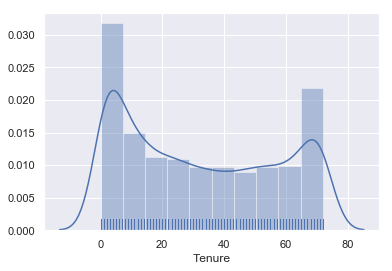

In [7]:
g = sns.distplot(data['Tenure'],kde=True, bins=10, rug=True)

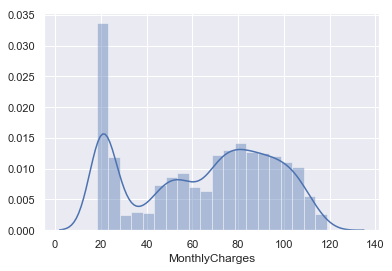

In [9]:
g = sns.distplot(data['MonthlyCharges'], kde=True, bins=20)

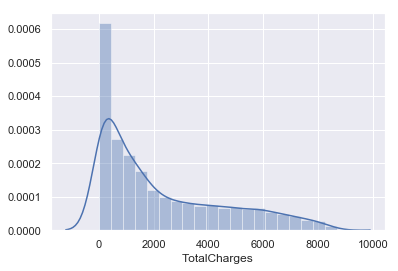

In [10]:
g = sns.distplot(data['TotalCharges'], kde=True, bins=20)

In [11]:
data['Gender'].value_counts()

Male      3555
Female    3488
Name: Gender, dtype: int64

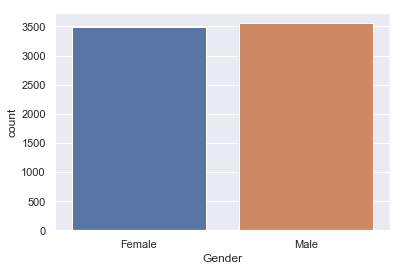

In [12]:
g = sns.countplot(x='Gender', data=data)

In [13]:
data['SeniorCitizen'].value_counts()

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

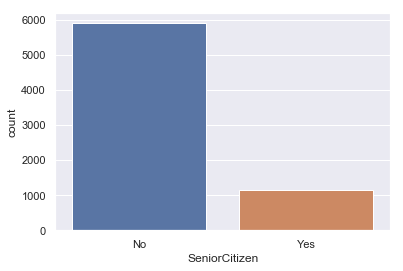

In [14]:
g = sns.countplot(x='SeniorCitizen', data=data)

In [15]:
data['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

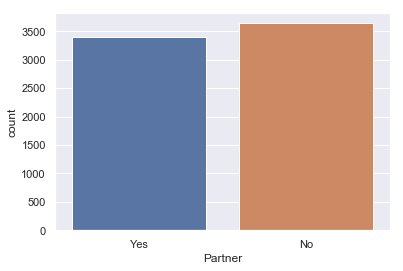

In [16]:
g = sns.countplot(x='Partner', data=data)

In [17]:
data['Dependents'].value_counts()

No     4921
Yes    2102
Name: Dependents, dtype: int64

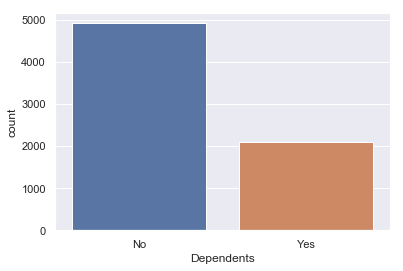

In [18]:
g = sns.countplot(x='Dependents', data=data)

In [19]:
data['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

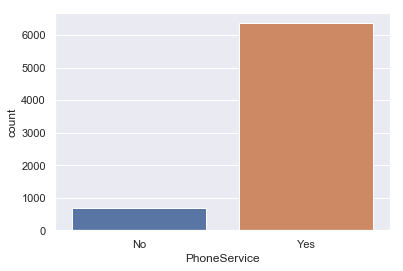

In [20]:
g = sns.countplot(x='PhoneService', data=data)

In [21]:
data['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

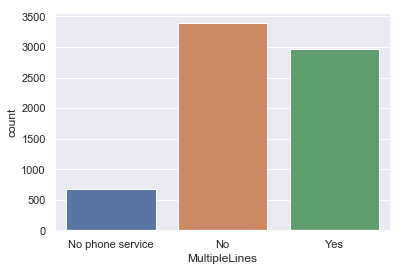

In [22]:
g = sns.countplot(x='MultipleLines', data=data)

In [23]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

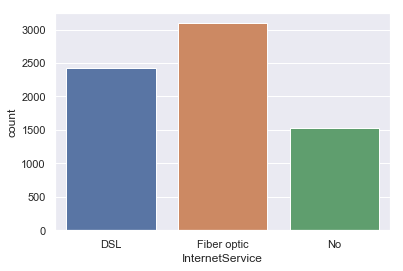

In [24]:
g = sns.countplot(x='InternetService', data=data)

In [25]:
data['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

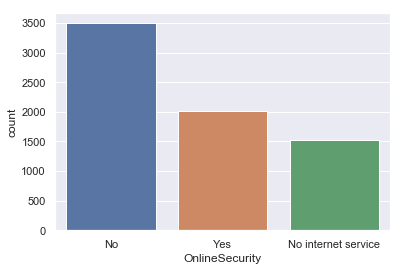

In [26]:
g = sns.countplot(x='OnlineSecurity', data=data)

In [27]:
data['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

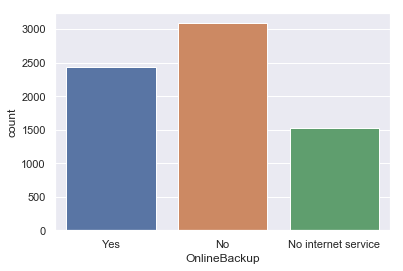

In [28]:
g = sns.countplot(x='OnlineBackup', data=data)

In [29]:
data['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

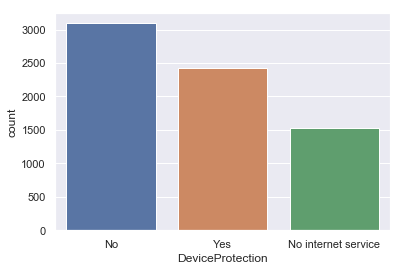

In [30]:
g = sns.countplot(x='DeviceProtection', data=data)

In [31]:
data['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

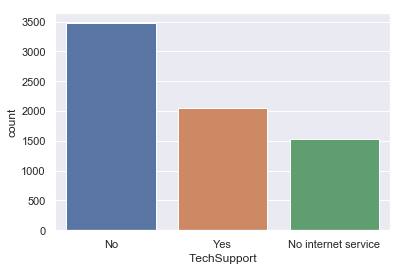

In [32]:
g = sns.countplot(x='TechSupport', data=data)

In [33]:
data['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

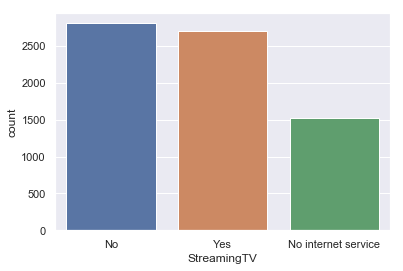

In [34]:
g = sns.countplot(x='StreamingTV', data=data)

In [35]:
data['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

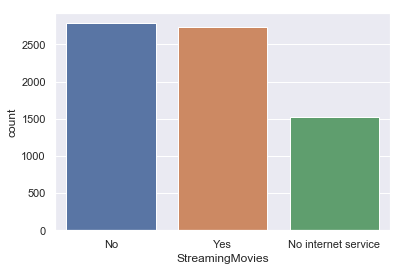

In [36]:
g = sns.countplot(x='StreamingMovies', data=data)

In [37]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

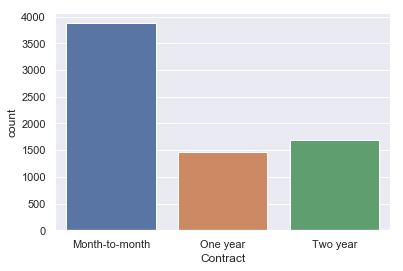

In [38]:
g = sns.countplot(x='Contract', data=data)

In [39]:
data['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

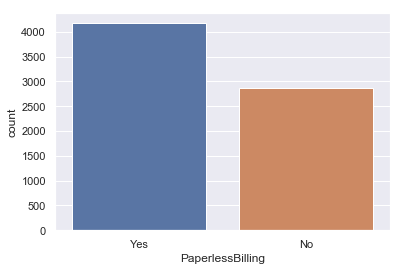

In [40]:
g = sns.countplot(x='PaperlessBilling', data=data)

In [41]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

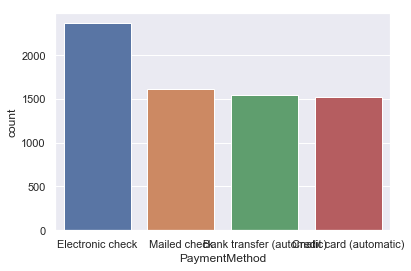

In [42]:
g = sns.countplot(x='PaymentMethod', data=data)

In [43]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

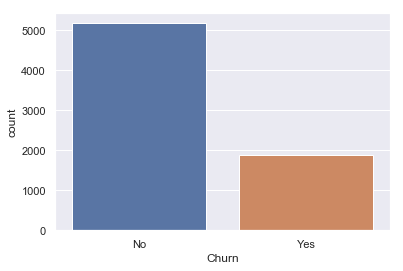

In [44]:
g = sns.countplot(x='Churn', data=data)

### Úloha 3 - Závislosti medzi číselnými atribútmi (3b)

Vypočítajte korelačnú maticu pre číselné atribúty a identifikujte, ktoré atribúty sú najviac korelované.

In [45]:
data.corr() #najviac korelovane atributy su "Tenure" a "TotalCharges", co je prirodzene a ocakavane

,Tenure,MonthlyCharges,TotalCharges
Tenure,1.000000,0.247732,0.825880
MonthlyCharges,0.247732,1.000000,0.651316
TotalCharges,0.825880,0.651316,1.000000


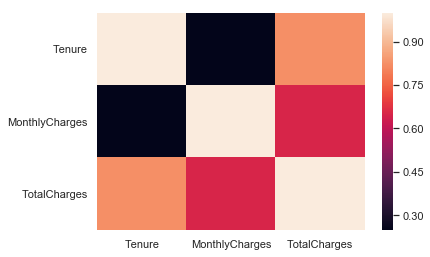

In [46]:
k = sns.heatmap(data.corr())

### Úloha 4 - Diskretizácia hodnôt (4b)

* Diskretizujte číselné atribúty `MonthlyCharges` a `TotalCharges` do 5 rovnako veľkých intervalov.
* Diskretizujte číselný atribút `Tenure` na 5 intervalov s rovnakou početnosťou príkladov.

In [47]:
data['New_MonthlyCharges'] = pd.cut(data['MonthlyCharges'], bins=5, include_lowest=True, labels=['very_low', 'low', 'standard', 'high', 'very_high'])
data['New_MonthlyCharges'].value_counts()

high         1817
very_low     1797
standard     1361
very_high    1042
low          1000
Name: New_MonthlyCharges, dtype: int64

In [48]:
data['New_TotalCharges'] = pd.cut(data['TotalCharges'], bins=5, include_lowest=True, labels=['malo', 'menej', 'normal', 'vela', 'velmi_vela'])
data['New_TotalCharges'].value_counts()

malo          3937
menej         1179
normal         866
vela           705
velmi_vela     345
Name: New_TotalCharges, dtype: int64

In [49]:
data['New_Tenure'] = pd.qcut(data['Tenure'], 5, labels=['very_short', 'short', 'avg', 'long', 'very_long'])
data['New_Tenure'].value_counts()

very_short    1481
avg           1408
very_long     1407
short         1397
long          1350
Name: New_Tenure, dtype: int64

### Úloha 5 - Závislosti medzi nominálnymi/ordinálnymi atribútmi (5b)

* Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi `Tenure`, `MonthlyCharges`, `TotalCharges` a atribútom `Churn` (využite diskretizovanie hodnôt z úlohy 4). Závislosti vizualizujte vhodným spôsobom pomocou knižnice Seaborn.
* Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi `Gender`, `SeniorCitizen` a atribútom `Churn`.
* Pomocou krížovej tabuľky zistite početnosť rôznych kombinácií služieb pre atribúty `PhoneService`, `InternetService`, `StreamingTV`, `StreamingMovies`. Početnosti vizualizujte aj pomocou Seaborn knižnice.

In [50]:
data['Churn'] = data['Churn'].map({"No":0, "Yes":1})

In [51]:
f = pd.pivot_table(data, index=['New_MonthlyCharges', 'New_TotalCharges'], values=['Churn'], columns=['New_Tenure'])
f

Churn                                \
New_Tenure                          very_short     short       avg      long   
New_MonthlyCharges New_TotalCharges                                            
very_low           malo               0.307522  0.105000  0.037143  0.033557   
                   menej                   NaN       NaN       NaN  0.000000   
low                malo               0.496970  0.237668  0.143750  0.000000   
                   menej                   NaN       NaN  0.162791  0.120805   
                   normal                  NaN       NaN       NaN       NaN   
standard           malo               0.649275  0.315113  0.217391       NaN   
                   menej                   NaN       NaN  0.188482  0.134921   
                   normal                  NaN       NaN       NaN  0.060870   
                   vela                    NaN       NaN       NaN       NaN   
high               malo               0.744337  0.571839  0.300000       NaN   
                   menej                   NaN  0.565217  0.352332  0.166667   
                   normal                  NaN       NaN  0.285714  0.184669   
                   vela                    NaN       NaN       NaN  0.204082   
                   velmi_vela              NaN       NaN       NaN       NaN   
very_high          malo               0.833333  0.728571       NaN       NaN   
                   menej                   NaN  0.533333  0.467290       NaN   
                   normal                  NaN       NaN  0.362319  0.346457   
                   vela                    NaN       NaN       NaN  0.282353   
                   velmi_vela              NaN       NaN       NaN  0.000000   

                                               
New_Tenure                          very_long  
New_MonthlyCharges New_TotalCharges            
very_low           malo              0.004566  
                   menej             0.000000  
low                malo                   NaN  
                   menej             0.040816  
                   normal            0.047619  
standard           malo                   NaN  
                   menej                  NaN  
                   normal            0.023392  
                   vela              0.032258  
high               malo                   NaN  
                   menej                  NaN  
                   normal            0.032258  
                   vela              0.057402  
                   velmi_vela        0.000000  
very_high          malo                   NaN  
                   menej                  NaN  
                   normal                 NaN  
                   vela              0.216667  
                   velmi_vela        0.111111

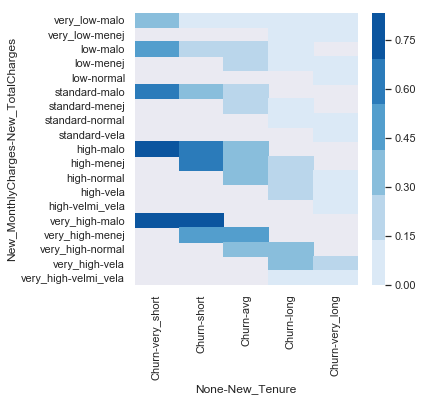

In [52]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(data=f,
           cmap=sns.color_palette("Blues"),
           ax=ax)
plt.show() 

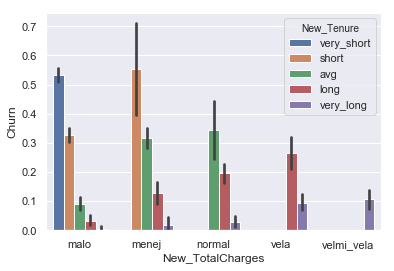

In [53]:
g = sns.barplot(x='New_TotalCharges', hue='New_Tenure', y='Churn', data=data)

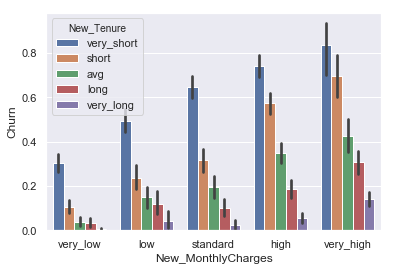

In [54]:
g = sns.barplot(x='New_MonthlyCharges', hue='New_Tenure', y='Churn', data=data)

In [55]:
pd.pivot_table(data, index=['SeniorCitizen', 'Gender'], values='Churn') #takze najviac nam odchadzaju seniory, zeny viac ako muzi

Churn
SeniorCitizen Gender          
No            Female  0.239384
              Male    0.232808
Yes           Female  0.422535
              Male    0.411150

In [56]:
e = pd.crosstab(index=[data['PhoneService'], data['InternetService']], columns=[data['StreamingTV'],data['StreamingMovies']])
e #tabulka, ktora obsahuje vsetky sluzby je znacne neprehladna, rovnako aj vizualizacia

StreamingTV                    No      No internet service  Yes      
StreamingMovies                No  Yes No internet service   No   Yes
PhoneService InternetService                                         
No           DSL              299   98                   0   85   200
Yes          DSL              814  253                   0  242   430
             Fiber optic      905  441                   0  440  1310
             No                 0    0                1526    0     0

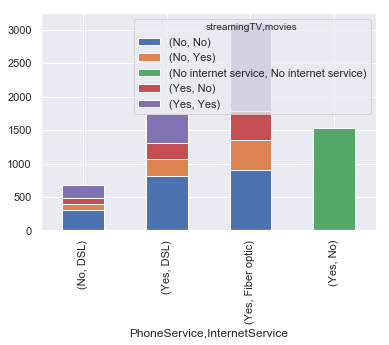

In [57]:
e.plot.bar(stacked=True)
plt.legend(title='streamingTV,movies')

plt.show()

In [58]:
a = pd.crosstab(index=[data['PhoneService']], columns=[data['StreamingTV'],data['StreamingMovies']])
a

StreamingTV        No      No internet service  Yes      
StreamingMovies    No  Yes No internet service   No   Yes
PhoneService                                             
No                299   98                   0   85   200
Yes              1719  694                1526  682  1740

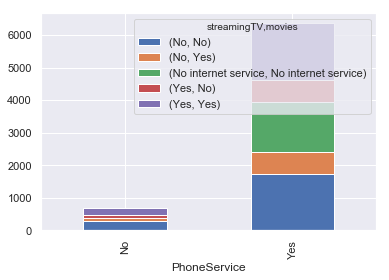

In [59]:
a.plot.bar(stacked=True)
plt.legend(title='streamingTV,movies')

plt.show()

In [60]:
b = pd.crosstab(index=[data['InternetService']], columns=[data['StreamingTV'],data['StreamingMovies']])
b

StreamingTV        No      No internet service  Yes      
StreamingMovies    No  Yes No internet service   No   Yes
InternetService                                          
DSL              1113  351                   0  327   630
Fiber optic       905  441                   0  440  1310
No                  0    0                1526    0     0

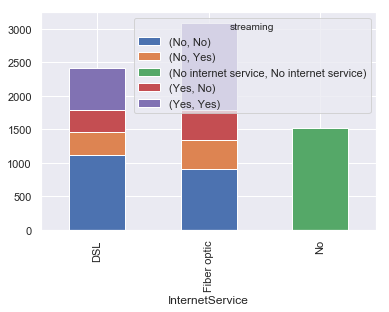

In [61]:
b.plot.bar(stacked=True)
plt.legend(title='streaming')

plt.show()

In [62]:
c = pd.crosstab(index=[data['InternetService']], columns=[data['PhoneService']])
c

PhoneService,No,Yes
InternetService,,
DSL,682,1739
Fiber optic,0,3096
No,0,1526


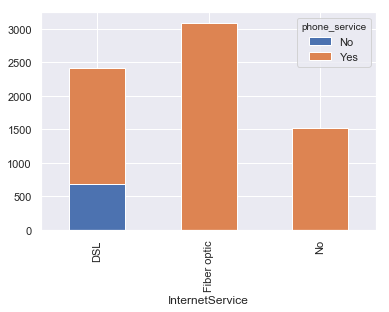

In [63]:
c.plot.bar(stacked=True)
plt.legend(title='phone_service')

plt.show()

In [64]:
d = pd.crosstab(index=[data['StreamingTV']], columns=[data['StreamingMovies']])
d

StreamingMovies,No,No internet service,Yes
StreamingTV,,,
No,2018,0,792
No internet service,0,1526,0
Yes,767,0,1940


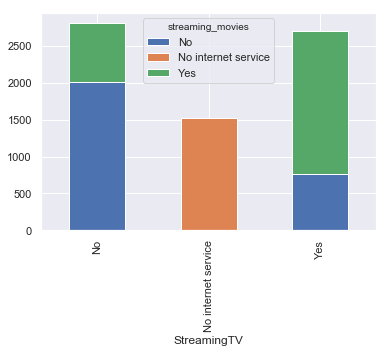

In [65]:
d.plot.bar(stacked=True)
plt.legend(title='streaming_movies')

plt.show()

### Úloha 6 - Nahradenie chýbajúcich hodnôt (5b)

* Vhodným spôsobom nahraďte chýbajúce hondnoty v atribúte `MonthlyCharges` v závislosti od atribútu `TotalCharges` a `Tenure`.
* Pre hodnoty `TotalCharges` porozmýšľajte nad odvodením chýbajúcich hodnôt na základe `Tenure`.
* Vhodným spôsobom nahraďte chýbajúce hodnoty v atribúte `Dependents` v závislosti od atribútov `Gender` a `Partner`.

In [66]:
pd.pivot_table(data, index=['TotalCharges', 'Tenure'], values='MonthlyCharges')

,,MonthlyCharges
TotalCharges,Tenure,
18.80,1,18.80
18.85,1,18.85
18.90,1,18.90
19.00,1,19.00
19.05,1,19.05
19.10,1,19.10
19.15,1,19.15
19.20,1,19.20
19.25,1,19.25


In [67]:
def replace_MCH(row):
    MonthlyCharges = row['MonthlyCharges']
    Tenure = row['Tenure']
    TotalCharges = row['TotalCharges']
    if pd.isna(MonthlyCharges):
        return (TotalCharges)/(Tenure)
    else:
        return MonthlyCharges
MonthlyCharges1 = data.apply(replace_MCH, axis=1)

In [68]:
data['MonthlyCharges'] = MonthlyCharges1

In [69]:
data.tail()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,New_MonthlyCharges,New_TotalCharges,New_Tenure
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,One year,Yes,Mailed check,84.800000,1990.50,0,high,menej,avg
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,One year,Yes,Credit card (automatic),103.200000,7362.90,0,very_high,velmi_vela,very_long
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,Month-to-month,Yes,Electronic check,29.600000,346.45,0,very_low,malo,short
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,Month-to-month,Yes,Mailed check,74.400000,306.60,1,standard,malo,very_short
7042,Male,No,No,No,66,Yes,No,Fiber optic,Yes,No,...,Yes,Two year,Yes,Bank transfer (automatic),103.704545,6844.50,0,NaN,vela,very_long


In [70]:
data['MonthlyCharges'].isna().sum()

0

In [71]:
data['New_MonthlyCharges'] = pd.cut(data['MonthlyCharges'], bins=5, include_lowest=True, labels=['very_low', 'low', 'standard', 'high', 'very_high'])
data['New_MonthlyCharges'].value_counts()

high         1826
very_low     1798
standard     1368
very_high    1047
low          1004
Name: New_MonthlyCharges, dtype: int64

In [72]:
pd.pivot_table(data, index=['TotalCharges'], values='Tenure', aggfunc="mean") # Najjednoduchsie by bolo odvodit chybajuce hodnoty v TotalCharges na zaklade diskretizovaneho atributu Tenure. Ale kedze su velmi korelovane, jeden z nich som sa rozhodla pred modelovanim odstranit a bude to TotalCharges. 

,Tenure
TotalCharges,
18.80,1.0
18.85,1.0
18.90,1.0
19.00,1.0
19.05,1.0
19.10,1.0
19.15,1.0
19.20,1.0
19.25,1.0


In [73]:
data['Dependents'] = data['Dependents'].map({"No":0, "Yes":1})

In [74]:
d = pd.pivot_table(data, index=['Gender', 'Partner'], values=['Dependents'], aggfunc='median')
d

Dependents
Gender Partner            
Female No              0.0
       Yes             1.0
Male   No              0.0
       Yes             1.0

In [75]:
def replace_D(row):
    Dependents = row['Dependents']
    Gender = row['Gender']
    Partner = row['Partner']
    if pd.isna(Dependents):
        if Partner == "Yes": 
            return "1"
        else:
            return "0"
    else:
        return Dependents
Dependents1 = data.apply(replace_D, axis=1)

In [76]:
data['Dependents'] = Dependents1

In [77]:
data['Dependents'].isna().sum()

0

In [78]:
data.head(10)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,New_MonthlyCharges,New_TotalCharges,New_Tenure
0,Female,No,Yes,0,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,very_low,malo,very_short
1,Male,No,No,0,34,Yes,No,DSL,Yes,No,...,No,One year,No,Mailed check,56.95,1889.50,0,low,menej,avg
2,Male,No,No,0,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,low,malo,very_short
3,Male,No,No,0,45,No,No phone service,DSL,Yes,No,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,low,menej,long
4,Female,No,No,0,2,Yes,No,Fiber optic,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,standard,malo,very_short
5,Female,No,No,0,8,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,very_high,malo,short
6,Male,No,No,1,22,Yes,Yes,Fiber optic,No,Yes,...,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0,high,menej,avg
7,Female,No,No,0,10,No,No phone service,DSL,Yes,No,...,No,Month-to-month,No,Mailed check,29.75,301.90,0,very_low,malo,short
8,Female,No,Yes,0,28,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,very_high,menej,avg
9,Male,No,No,1,62,Yes,No,DSL,Yes,Yes,...,No,One year,No,Bank transfer (automatic),56.15,3487.95,0,low,normal,very_long


### Úloha 7 - Odvodenie nových atribútov (5b)

* Vytvorte nový atribút `TotalMonthCharges`, ktorého hondoty sú rovné `MonthlyCharges * Tenure`.
* Vytvorte nový atribút `TotalRatio` ktorý bude mať hodnotu -1 ak `TotalMonthCharges < TotalCharges`, 0 ak `TotalMonthCharges = TotalCharges` a +1 ak `TotalMonthCharges > TotalCharges`.

In [79]:
data['TotalMonthCharges'] = data.eval("MonthlyCharges * Tenure")

In [80]:
def new_attribute(row):
    #TotalMonthCharges = data['TotalMonthCharges']
    #TotalCharges = data['TotalCharges']
    if row ['TotalMonthCharges'] < row['TotalCharges']:
        return "-1"
    elif row ['TotalMonthCharges'] == row['TotalCharges']:
        return "0"
    else:
        return "+1"
TotalRatio1 = data.apply(new_attribute, axis=1)

In [81]:
data['TotalRatio'] = TotalRatio1

In [82]:
data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,New_MonthlyCharges,New_TotalCharges,New_Tenure,TotalMonthCharges,TotalRatio
0,Female,No,Yes,0,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,0,very_low,malo,very_short,29.85,0
1,Male,No,No,0,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,0,low,menej,avg,1936.30,+1
2,Male,No,No,0,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,1,low,malo,very_short,107.70,-1
3,Male,No,No,0,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,0,low,menej,long,1903.50,+1
4,Female,No,No,0,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,1,standard,malo,very_short,141.40,-1


### Úloha 8 - Prevedenie dát do podoby vhodnej pre modelovanie (5b)

Predspracovaný dátový rámec preveďte do podoby vhodnej pre modelovanie:
* Použite vhodný spôsob transformovania kategorických atribútov
* Použite normalizáciu zvolených atribútov pre modely, pre ktoré je normalizácia vhodná
* Zvoľte, ktoré z atribútov (pôvodných a vytvorených/transformovaných) použijete pri tvorbe modelov.

In [83]:
data = data.drop(columns=['Tenure','MonthlyCharges','TotalCharges', 'TotalRatio', 'TotalMonthCharges', 'New_TotalCharges']) #duplicitne informacie
data.head()

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,New_MonthlyCharges,New_Tenure
0,Female,No,Yes,0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0,very_low,very_short
1,Male,No,No,0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0,low,avg
2,Male,No,No,0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1,low,very_short
3,Male,No,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0,low,long
4,Female,No,No,0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1,standard,very_short


In [84]:
data['OnlineBackup'] = data['OnlineBackup'].map({"No":0, "Yes":1, "No internet service":0}) #y dovodu, ze informacia o "No internet service" sa vyskytuje vo viacerych atributoch a jej hodnota je rovnaka, rozhodla som sa ju zaradit k "No". Rovnako to plati aj o "No phone service".

In [85]:
data['OnlineBackup'].value_counts()

0    4614
1    2429
Name: OnlineBackup, dtype: int64

In [86]:
data['OnlineSecurity'] = data['OnlineSecurity'].map({"No":0, "Yes":1, "No internet service":0})

In [87]:
data['OnlineSecurity'].value_counts()

0    5024
1    2019
Name: OnlineSecurity, dtype: int64

In [88]:
data['DeviceProtection'] = data['DeviceProtection'].map({"No":0, "Yes":1, "No internet service":0})

In [89]:
data['DeviceProtection'].value_counts()

0    4621
1    2422
Name: DeviceProtection, dtype: int64

In [90]:
data['TechSupport'] = data['TechSupport'].map({"No":0, "Yes":1, "No internet service":0})

In [91]:
data['TechSupport'].value_counts()

0    4999
1    2044
Name: TechSupport, dtype: int64

In [92]:
data['StreamingMovies'] = data['StreamingMovies'].map({"No":0, "Yes":1, "No internet service":0})

In [93]:
data['StreamingMovies'].value_counts()

0    4311
1    2732
Name: StreamingMovies, dtype: int64

In [94]:
data['StreamingTV'] = data['StreamingTV'].map({"No":0, "Yes":1, "No internet service":0})

In [95]:
data['StreamingTV'].value_counts()

0    4336
1    2707
Name: StreamingTV, dtype: int64

In [96]:
data['MultipleLines'] = data['MultipleLines'].map({"No":0, "Yes":1, "No phone service":0})

In [97]:
data['MultipleLines'].value_counts()

0    4072
1    2971
Name: MultipleLines, dtype: int64

In [98]:
from sklearn.preprocessing import LabelEncoder

In [99]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

In [100]:
data['SeniorCitizen'] = LabelEncoder().fit_transform(data['SeniorCitizen'])

In [101]:
data['Partner'] = LabelEncoder().fit_transform(data['Partner'])

In [102]:
data['PhoneService'] = LabelEncoder().fit_transform(data['PhoneService'])

In [103]:
data['PaperlessBilling'] = LabelEncoder().fit_transform(data['PaperlessBilling'])

In [104]:
data.head()

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,New_MonthlyCharges,New_Tenure
0,0,0,1,0,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,0,very_low,very_short
1,1,0,0,0,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,0,low,avg
2,1,0,0,0,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,1,low,very_short
3,1,0,0,0,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),0,low,long
4,0,0,0,0,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,1,standard,very_short


In [105]:
data = pd.get_dummies(data, columns=['New_MonthlyCharges', 'New_Tenure','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies', 'StreamingTV', 'Contract', 'PaymentMethod'])
data.head()

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,New_MonthlyCharges_very_low,New_MonthlyCharges_low,New_MonthlyCharges_standard,...,StreamingMovies_1,StreamingTV_0,StreamingTV_1,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,1,1,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,1,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0


In [106]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler() 
data = pd.DataFrame(scaler.fit_transform(data), index=data.index, columns=data.columns)
data.head() 

C:\Users\katar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int32, int64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,New_MonthlyCharges_very_low,New_MonthlyCharges_low,New_MonthlyCharges_standard,...,StreamingMovies_1,StreamingTV_0,StreamingTV_1,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Úloha 9 - Rozdelenie dát na trénovanie a testovanie (2b)

* Rozdeľte dátovú množinu do matice príznakov a vektora hodnôt cieľového atribútu
* Rozdeľte dáta do trénovacej a testovacej množiny v pomere 70/30.

In [107]:
X_data = data.drop('Churn', axis=1)
y_data = data['Churn']

print(X_data.shape)
print(y_data.shape)

(7043, 40)
(7043,)


In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=1)

### Úloha 10 - Natrénovanie klasifikačných modelov a nájdenie optimálnych parametrov (6b)

Natrénujte klasifikačné modely rôznych typov (Stromy, kNN, Naive Bayes, Random Forests). Pre nájdenie optimálnych parametrov modelov jednotlivých typov modelov použite GridSearch. V rámci GridSearch modely validujte 5- násobnou krížovou validáciou a ako metriku pre ich vyhodnotenie použite `accuracy`.

In [109]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 50))
print(k_range)
param_grid = dict(n_neighbors=k_range)
print(param_grid)
grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Najlepšie parametre sú:")
print()
print(grid.best_params_)
print()
print(grid.best_score_)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]}
Najlepšie parametre sú:

{'n_neighbors': 36}

0.7898580121703854


In [110]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score

criterion_range = ['gini', 'entropy'] 
max_depth_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
min_samples_split_range = [2, 4, 8, 10] 
min_samples_leaf_range = [1, 5, 10, 15] 

param_grid = dict(criterion=criterion_range, max_depth=max_depth_range, min_samples_split = min_samples_split_range, min_samples_leaf = min_samples_leaf_range)
#print(param_grid)

rf = RandomForestClassifier()
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Najlepšia kombinácia parametrov je:")
print(grid.best_params_)
print()
print("A hodnota presnosti modelu pri tejto kombinacii je:")
print(grid.best_score_)

Najlepšia kombinácia parametrov je:
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 4}

A hodnota presnosti modelu pri tejto kombinacii je:
0.7967545638945234


In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
criterion_range = ['gini', 'entropy'] 
max_depth_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
min_samples_split_range = [2, 4, 8, 10] 
min_samples_leaf_range = [1, 5, 10, 15] 
presort_range = [True, False]

param_grid = dict(criterion=criterion_range, max_depth=max_depth_range, min_samples_split = min_samples_split_range, min_samples_leaf = min_samples_leaf_range, presort = presort_range )
#print(param_grid)

dtree = DecisionTreeClassifier()

grid = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='accuracy') 
grid.fit(X_train, y_train) 

print("Najlepšia kombinácia parametrov je:")
print(grid.best_params_)
print()
print("A hodnota presnosti modelu pri tejto kombinacii je:")
print(grid.best_score_)

Najlepšia kombinácia parametrov je:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2, 'presort': True}

A hodnota presnosti modelu pri tejto kombinacii je:
0.7884381338742393


### Úloha 11 - Porovnanie modelov pomocou ROC kriviek (4b)

* Modely otestujte na testovacej množine a modely jednotlivých typov s najvhodnejšími parametrami vzájomne porovnajte pomocou ROC kriviek a AUC koeficientov. ROC krivky vykreslite pomocou matplotlib a nájdite najlepší z modelov.  

In [113]:
model1 = KNeighborsClassifier(n_neighbors=36)                    
model1.fit(X_train, y_train)                           
y_model1 = model1.predict(X_test)   

from sklearn.metrics import accuracy_score,precision_score, recall_score

print(f"Presnosť (accuracy) modelu1: {accuracy_score(y_test, y_model1)}")
print(f"Presnosť (precision) modelu1: {precision_score(y_test, y_model1)}")
print(f"Návratnosť (recall) modelu1: {recall_score(y_test, y_model1)}")
cm = confusion_matrix(y_test, y_model1)
print(cm)

Presnosť (accuracy) modelu1: 0.7993374349266446
Presnosť (precision) modelu1: 0.6007751937984496
Návratnosť (recall) modelu1: 0.5871212121212122
[[1379  206]
 [ 218  310]]


In [114]:
rf = RandomForestClassifier(criterion="entropy", max_depth=7, min_samples_leaf=10, min_samples_split=4)
rf.fit(X_train, y_train)

y_rf = rf.predict(X_test)
print(f"Presnosť (accuracy) modelu_rf: {accuracy_score(y_test, y_rf)}")
print(f"Presnosť (precision) modelu_rf: {precision_score(y_test, y_rf)}")
print(f"Návratnosť (recall) modelu_rf: {recall_score(y_test, y_rf)}")
cm = confusion_matrix(y_test, y_rf)
print(cm)

Presnosť (accuracy) modelu_rf: 0.8064363464268812
Presnosť (precision) modelu_rf: 0.6447688564476886
Návratnosť (recall) modelu_rf: 0.5018939393939394
[[1439  146]
 [ 263  265]]


In [115]:
sorted(zip(rf.feature_importances_, X_train.columns), reverse=True)

[(0.16722406695170453, 'Contract_Month-to-month'),
 (0.12579488677593073, 'New_Tenure_very_short'),
 (0.10181723974030073, 'InternetService_Fiber optic'),
 (0.0859230674026841, 'PaymentMethod_Electronic check'),
 (0.074432587497932, 'Contract_Two year'),
 (0.04648550598963065, 'InternetService_DSL'),
 (0.044682310405389045, 'New_MonthlyCharges_very_low'),
 (0.0406111481695651, 'Contract_One year'),
 (0.034304914655148996, 'New_Tenure_very_long'),
 (0.029985738667025412, 'OnlineSecurity_1'),
 (0.01911073962615354, 'InternetService_No'),
 (0.016874078413585642, 'New_Tenure_short'),
 (0.015078648149116566, 'StreamingTV_0'),
 (0.014021489056814043, 'TechSupport_0'),
 (0.011999858530574453, 'OnlineBackup_0'),
 (0.011984560445967315, 'MultipleLines_1'),
 (0.011091650867671136, 'StreamingMovies_0'),
 (0.010908220359087326, 'Dependents'),
 (0.010844885041593458, 'TechSupport_1'),
 (0.009974436221218505, 'New_MonthlyCharges_high'),
 (0.009665708037374673, 'New_MonthlyCharges_standard'),
 (0.008

In [116]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_leaf=5, min_samples_split=2, presort=True)   
dt.fit(X_train, y_train)    
y_dt = dt.predict(X_test)  

print(f"Presnosť (accuracy) modelu_dt: {accuracy_score(y_test, y_dt)}")
print(f"Presnosť (precision) modelu_dt: {precision_score(y_test, y_dt)}")
print(f"Návratnosť (recall) modelu_dt: {recall_score(y_test, y_dt)}")

cm = confusion_matrix(y_test, y_dt)
print(cm)

Presnosť (accuracy) modelu_dt: 0.7969711310932324
Presnosť (precision) modelu_dt: 0.6633663366336634
Návratnosť (recall) modelu_dt: 0.3806818181818182
[[1483  102]
 [ 327  201]]


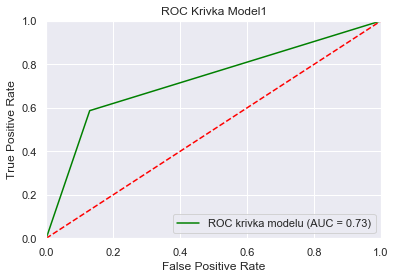

In [117]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(y_test, y_model1, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.title('ROC Krivka Model1')
plt.plot(fpr, tpr, color='green', label = 'ROC krivka modelu (AUC = %0.2f)' % roc_auc)
plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],linestyle='--', color='red') 
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.show() 

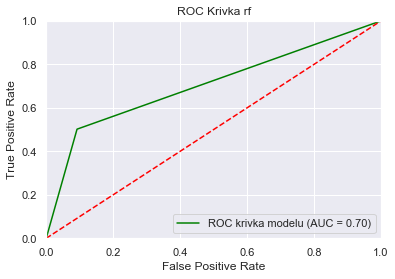

In [118]:
fpr, tpr, thresholds = roc_curve(y_test, y_rf, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.title('ROC Krivka rf')
plt.plot(fpr, tpr, color='green', label = 'ROC krivka modelu (AUC = %0.2f)' % roc_auc)
plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],linestyle='--', color='red') 
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.show() 

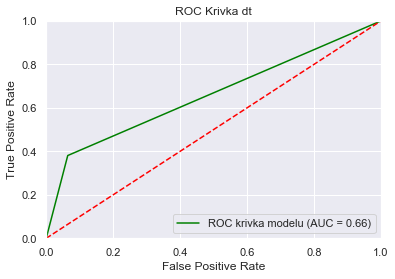

In [119]:
fpr, tpr, thresholds = roc_curve(y_test, y_dt, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.title('ROC Krivka dt')
plt.plot(fpr, tpr, color='green', label = 'ROC krivka modelu (AUC = %0.2f)' % roc_auc)
plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],linestyle='--', color='red') 
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.show() 

In [ ]:
#Najpresnejsi vysledok nam pri zvolenych kriteriach udava KNN model, tesne za nim nasleduje Decision Tree model.

### Úloha 12 - Vyhodnotenie modelu na testovacej množine (4b)

* Modely otestujte na testovacej množine, pri testovaní na testovacej množine vypíšte hodnoty metrík (accuracy, precision, recall) a confusion matrix. Porovnajte výsledky - ktorý z modelov najlepšie predikuje deteguje zákazníkov, ktorí od telekomunikačného operátora odídu?
* Vykreslite model rozhodovacích stromov (pomocou webgraphviz). Pokúste sa zo štruktúry modelu odvodiť klasifikačné pravidlo/pravidlá pre identifikáciu odchádzajúcich zákazníkov.

In [120]:
from sklearn import tree
from sklearn.tree import export_graphviz

with open("decision_tree.txt", "w") as f:
    f = tree.export_graphviz(dt, feature_names=X_data.columns.values, class_names=['0','1'], out_file=f)

In [ ]:
#Na zaklade Decision Tree modelu mozme konstatovat, ze najviac zakaznikov odchadza od operatora z kategorie Contract(Month to month), zvlast ti, ktori maju Fiber optic internet a su u daneho operatora pomerne kratko. Nasledovani su kategoriou zakaznikov s dvojrocnym kontraktom a nizkymi mesacnymi platbami.  